## 作業1

In [1]:
import pandas as pd
import numpy as np

In [36]:
country = ['America', 'China', 'Japan', 'Canada', 'Russia', 'Korea' ]
population = np.random.randint(5000, size = 6) 
data = {'國家': country,
        '人口': population}
data = pd.DataFrame(data)

In [37]:
data

,人口,國家
0,2975,America
1,2556,China
2,2307,Japan
3,1384,Canada
4,311,Russia
5,383,Korea


In [42]:
max_population = data.loc[data['人口'].idxmax()]
print("最多人口的國家: ", max_population['國家'], "人口數: ", max_population['人口'])

最多人口的國家:  America 人口數:  2975


## 作業2

### 讀取 txt 檔

In [2]:
## 假如我們不想把資料載到自己的電腦裡?
# 把連結填入
target_url = 'https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt'

In [10]:
import requests
response = requests.get(target_url)
data2 = response.text

# 用 request 傳送回來的資料不會認得斷行符號
print(len(data2))
data2[0:100]

784594


'n00015388_157\thttp://farm1.static.flickr.com/145/430300483_21e993670c.jpg\nn00015388_238\thttp://farm2'

In [11]:
# 找到換行符號，用該符號做字串分割後，把它拿掉
split_tag = '\n'

data2 = data2.split(split_tag)
print(len(data2))
data2[0:3]


9996


['n00015388_157\thttp://farm1.static.flickr.com/145/430300483_21e993670c.jpg',
 'n00015388_238\thttp://farm2.static.flickr.com/1005/3352960681_37b9c1d27b.jpg',
 'n00015388_304\thttp://farm1.static.flickr.com/27/51009336_a9663af3dd.jpg']

### 將 txt 轉成 pandas dataframe

In [18]:
arrange_data = []
split_tag2 = '\t'
for line in data2:
    line = line.split(split_tag2)
    arrange_data.append(line)

df = pd.DataFrame(arrange_data)
df = df.rename(columns ={0:'file_name', 1:'url'})
df.head()

,file_name,url
0,n00015388_157,http://farm1.static.flickr.com/145/430300483_2...
1,n00015388_238,http://farm2.static.flickr.com/1005/3352960681...
2,n00015388_304,http://farm1.static.flickr.com/27/51009336_a96...
3,n00015388_327,http://farm4.static.flickr.com/3025/2444687979...
4,n00015388_355,http://img100.imageshack.us/img100/3253/forres...


### 讀取圖片，請讀取上面 data frame 中的前 5 張圖片

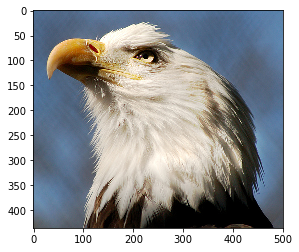

In [19]:
from PIL import Image
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt

# 請用 df.loc[...] 得到第一筆資料的連結
first_link = df.loc[0,'url']

response = requests.get(first_link)
img = Image.open(BytesIO(response.content))

# Convert img to numpy array

plt.imshow(img)
plt.show()

In [39]:
def img2arr_fromURLs(url_list, resize = False):

    img_list = []
    for url in url_list:
        try:
            img = Image.open(BytesIO(requests.get(url).content))
            img_list.append(img)
            
        except IOError:
            print(url, 'are unavilable')
            break        

    return img_list

In [ ]:
result = img2arr_fromURLs(df[0:5]['url'].values)
print("Total images that we got: %i " % len(result)) # 如果不等於 5, 代表有些連結失效囉

for im_get in result:
    plt.imshow(im_get)
    plt.show()